In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [141]:
df = pd.read_csv('../cleaning/output/processed_data.tsv', sep='\t')

X = df.drop(['Mức giá', 'Tên', 'Quận', 'Thành phố'], axis=1)
y = df['Mức giá']

# best_mape = float('inf')
# best_random_state = None
# best_model = None

# # Thử nghiệm với nhiều giá trị random_state khác nhau
# for i in range(0,200): 
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
#     model = RandomForestRegressor(random_state=1)
#     model.fit(X_train, y_train)
    
#     y_pred = model.predict(X_test)
#     mape = mean_absolute_percentage_error(y_test, y_pred)
    
#     if mape < best_mape:
#         best_mape = mape
#         best_random_state = i
#         best_model = model

# print(f'Best MAPE: {best_mape} with random_state: {best_random_state}')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=128)

In [142]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [143]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Absolute Error: 1.6255851975868605
R-squared: 0.7491413531288549
Mean Absolute Percentage Error (MAPE): 0.2660268319598832


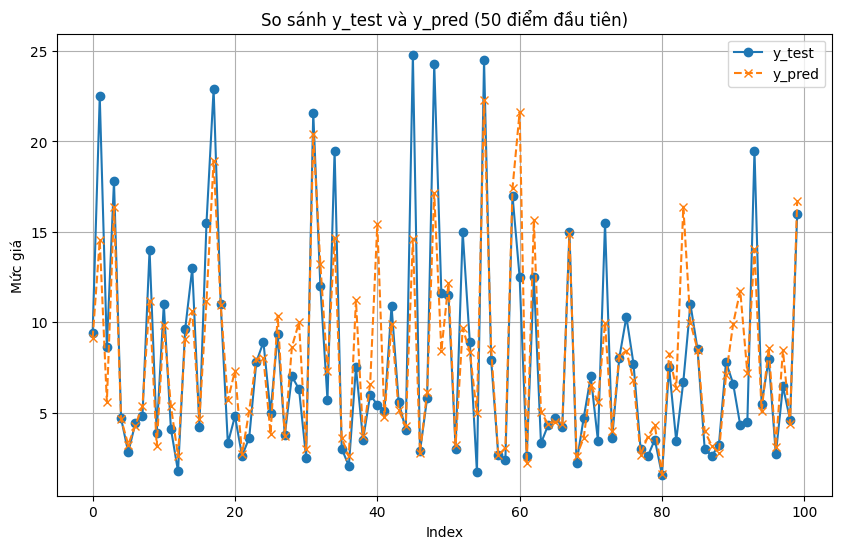

In [144]:
import matplotlib.pyplot as plt
n = 100

index = range(n)

# Chọn 100 giá trị đầu tiên từ y_test và y_pred
y_test_subset = y_test[:n]
y_pred_subset = y_pred[:n]

# Vẽ biểu đồ đường cho y_test và y_pred
plt.figure(figsize=(10, 6))
plt.plot(index, y_test_subset, label='y_test', marker='o', linestyle='-')
plt.plot(index, y_pred_subset, label='y_pred', marker='x', linestyle='--')

plt.xlabel('Index')
plt.ylabel('Mức giá')
plt.title('So sánh y_test và y_pred (50 điểm đầu tiên)')
plt.legend()
plt.grid(True)

plt.show()


In [145]:
# from sklearn.model_selection import GridSearchCV
# # Thiết lập các hyperparameters để thử nghiệm
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Tạo mô hình với Grid Search
# grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
#                            param_grid=param_grid, 
#                            cv=3, 
#                            n_jobs=-1, 
#                            verbose=2,
#                            scoring='neg_mean_absolute_error')

# # Huấn luyện mô hình với Grid Search
# grid_search.fit(X_train, y_train)

# # Lấy mô hình tốt nhất
# best_model = grid_search.best_estimator_

# # Dự đoán với mô hình tốt nhất
# y_pred_optimized = best_model.predict(X_test)

# # Tính toán các chỉ số đánh giá
# mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
# mse_optimized = mean_squared_error(y_test, y_pred_optimized)
# rmse_optimized = mean_squared_error(y_test, y_pred_optimized, squared=False)
# r2_optimized = r2_score(y_test, y_pred_optimized)
# mape_optimized = mean_absolute_percentage_error(y_test, y_pred_optimized)

# # In kết quả
# print(f'Optimized Mean Absolute Error: {mae_optimized}')
# print(f'Optimized Mean Squared Error: {mse_optimized}')
# print(f'Optimized Root Mean Squared Error: {rmse_optimized}')
# print(f'Optimized R-squared: {r2_optimized}')
# print(f'Optimized Mean Absolute Percentage Error (MAPE): {mape_optimized}')